Cell 1 – Imports & Settings

In [1]:
# Telco Customer Churn - Advanced EDA
# Author: <your name>

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

from scipy.stats import chi2_contingency, f_oneway

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
pd.set_option("display.max_columns", 50)


🧩 Cell 2 – Load the Dataset

In [2]:
# Update the filename if needed
DATA_PATH = "Telco-Customer-Churn.csv"

df = pd.read_csv(DATA_PATH)

print("✅ Data loaded successfully.")
print("Shape (rows, columns):", df.shape)

df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Telco-Customer-Churn.csv'

In [3]:
# Update the filename if needed
DATA_PATH = "Telco-Customer-Churn.csv"

df = pd.read_csv(DATA_PATH)

print("✅ Data loaded successfully.")
print("Shape (rows, columns):", df.shape)

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Telco-Customer-Churn.csv'

In [4]:
# Update the filename if needed
DATA_PATH = "Telco-Customer-Churn.csv"

df = pd.read_csv(DATA_PATH)

print("✅ Data loaded successfully.")
print("Shape (rows, columns):", df.shape)

df.head()

✅ Data loaded successfully.
Shape (rows, columns): (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


🧩 Cell 3 – Basic Info & First Look

In [5]:
# Basic information about columns and types
print("=== Data Info ===")
df.info()

print("\n=== First 5 Rows ===")
display(df.head())

print("\n=== Summary Statistics (numeric) ===")
display(df.describe())


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



=== Summary Statistics (numeric) ===


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


🧩 Cell 4 – Basic Cleaning (Strip Whitespace, Standardize)

In [6]:
# Strip whitespace from string columns to avoid subtle issues
str_cols = df.select_dtypes(include=["object"]).columns
for col in str_cols:
    df[col] = df[col].astype(str).str.strip()

print("✅ Stripped whitespace from string columns.")

✅ Stripped whitespace from string columns.


🧩 Cell 5 – Missing Values Overview

=== Missing Values Count ===


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

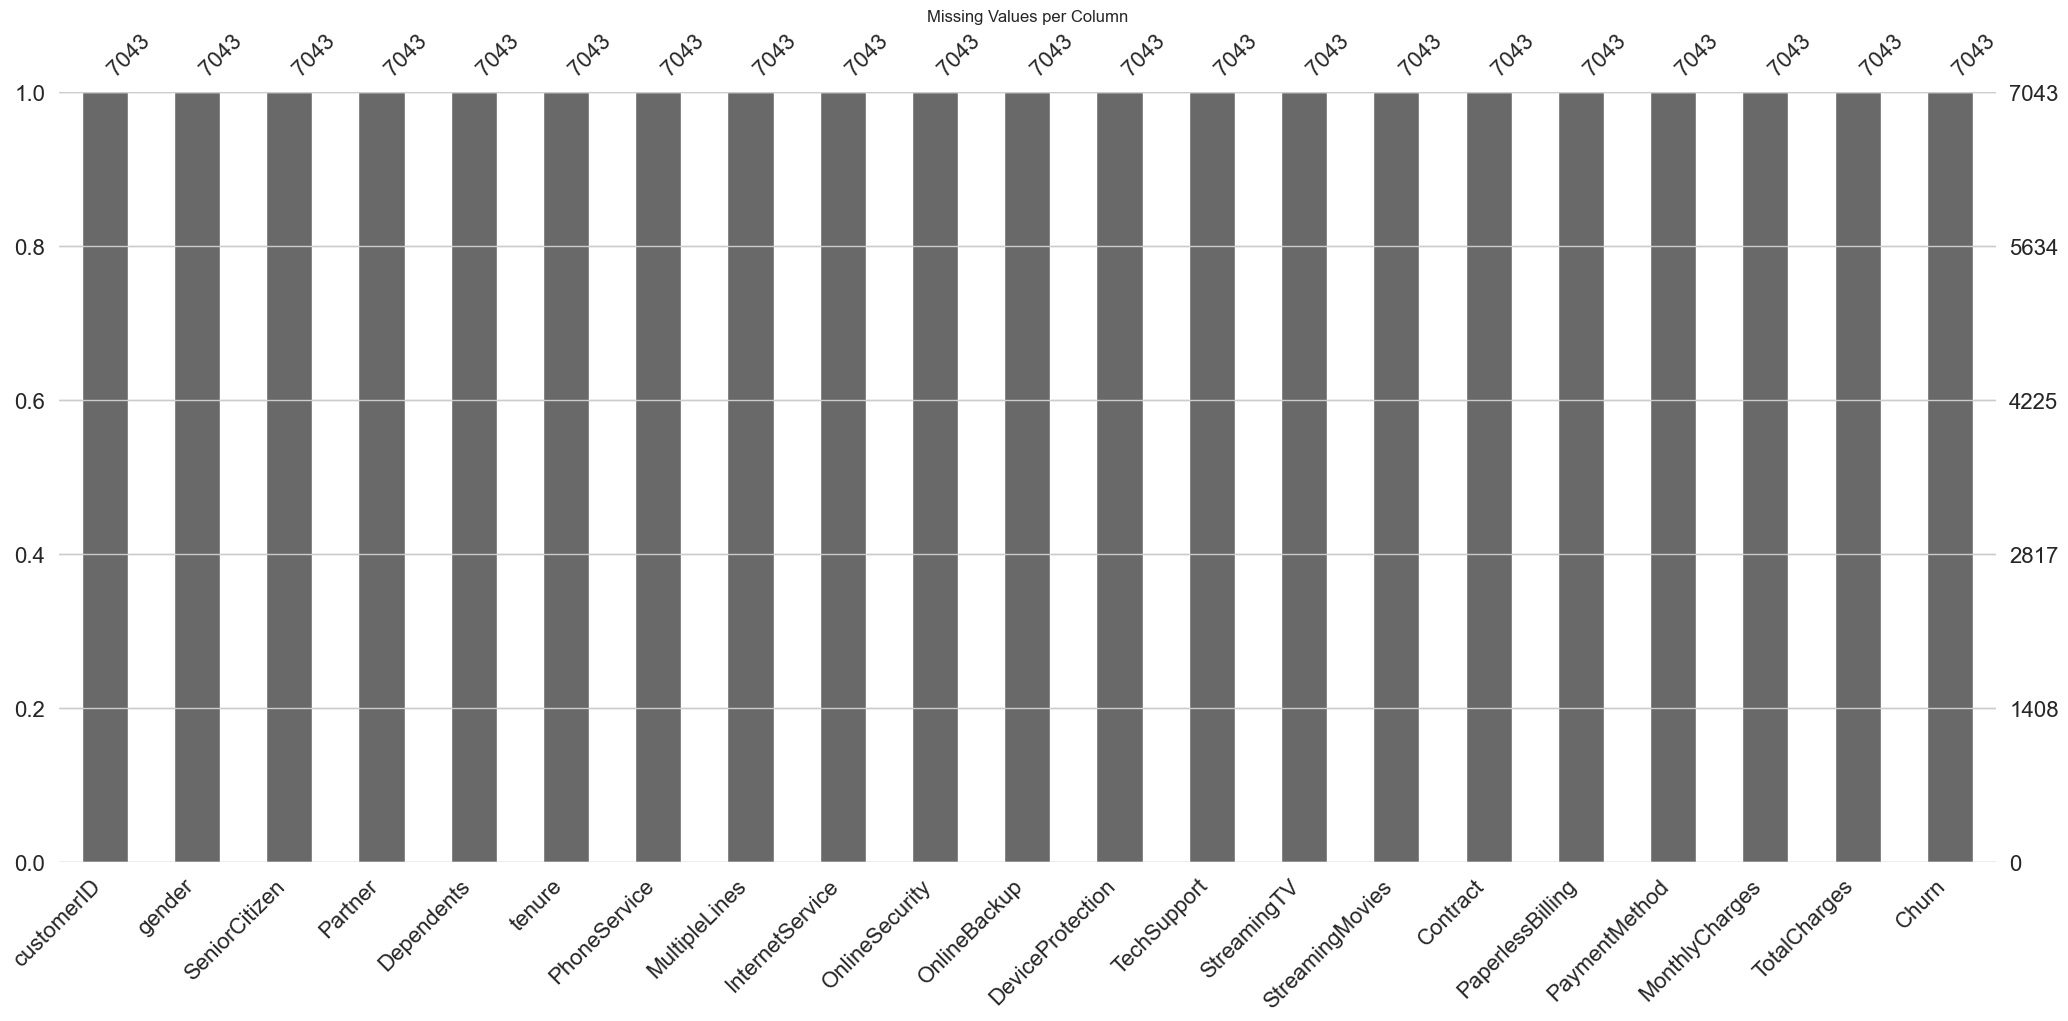

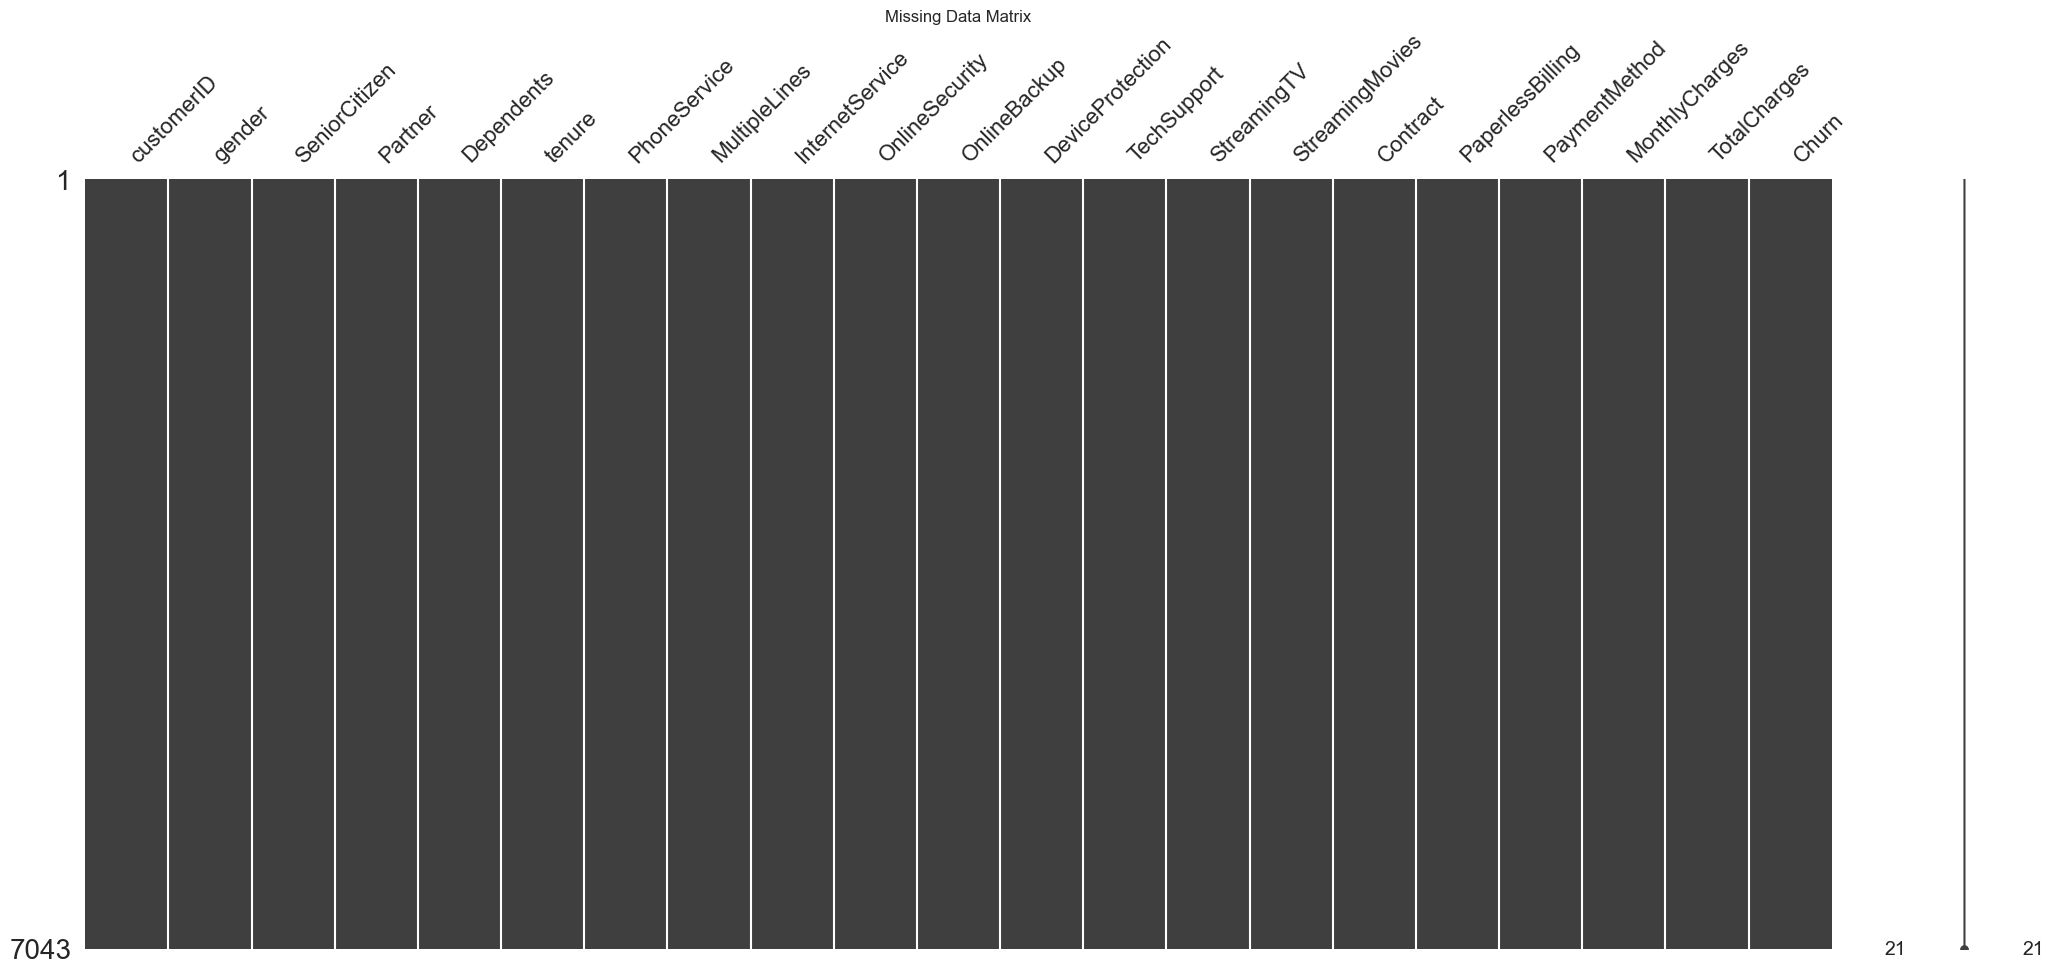

In [7]:
print("=== Missing Values Count ===")
display(df.isnull().sum())

# Visualize missingness
msno.bar(df)
plt.title("Missing Values per Column")
plt.show()

msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()


🧩 Cell 6 – Special Handling for TotalCharges

In [8]:
# Check type of TotalCharges
print("TotalCharges dtype before:", df["TotalCharges"].dtype)

# Convert to numeric; invalid parsing will be set to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

print("TotalCharges dtype after:", df["TotalCharges"].dtype)

# Check how many NaNs were created
print("Missing TotalCharges after conversion:", df["TotalCharges"].isna().sum())

# Impute missing TotalCharges with median
median_total = df["TotalCharges"].median()
df["TotalCharges"].fillna(median_total, inplace=True)

print("✅ Filled missing TotalCharges with median:", median_total)
print("Missing TotalCharges now:", df["TotalCharges"].isna().sum())


TotalCharges dtype before: object
TotalCharges dtype after: float64
Missing TotalCharges after conversion: 11
✅ Filled missing TotalCharges with median: 1397.475
Missing TotalCharges now: 0


🧩 Cell 7 – Check for Duplicates

In [9]:
dup_count = df.duplicated().sum()
print("Number of duplicate rows:", dup_count)

if dup_count > 0:
    df = df.drop_duplicates()
    print("✅ Duplicates dropped. New shape:", df.shape)
else:
    print("✅ No duplicate rows found.")


Number of duplicate rows: 0
✅ No duplicate rows found.


🧩 Cell 8 – Target Variable Distribution (Churn)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


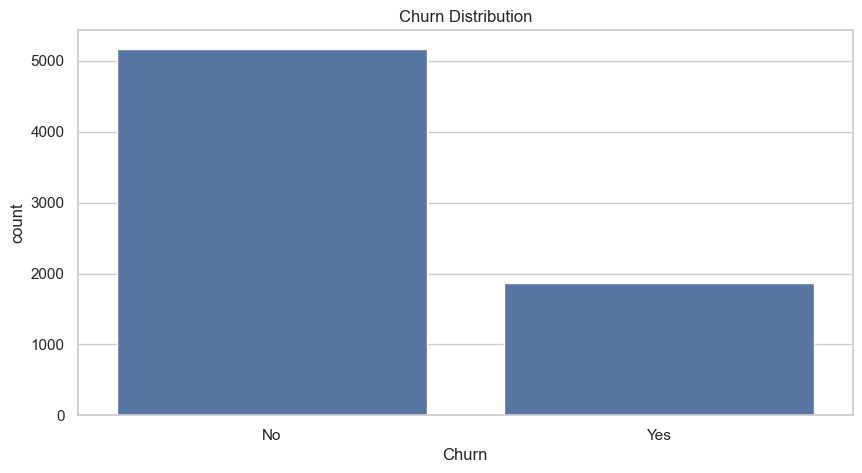

In [10]:
print(df["Churn"].value_counts())
print("\nChurn percentage:")
print(df["Churn"].value_counts(normalize=True) * 100)

sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()


🧩 Cell 9 – Separate Categorical & Numerical Features

In [11]:
# We'll define numeric and categorical columns for later use
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [12]:
if "customerID" in cat_cols:
    cat_cols.remove("customerID")

🧩 Cell 10 – Univariate Analysis: Numeric Features

=== SeniorCitizen ===


count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

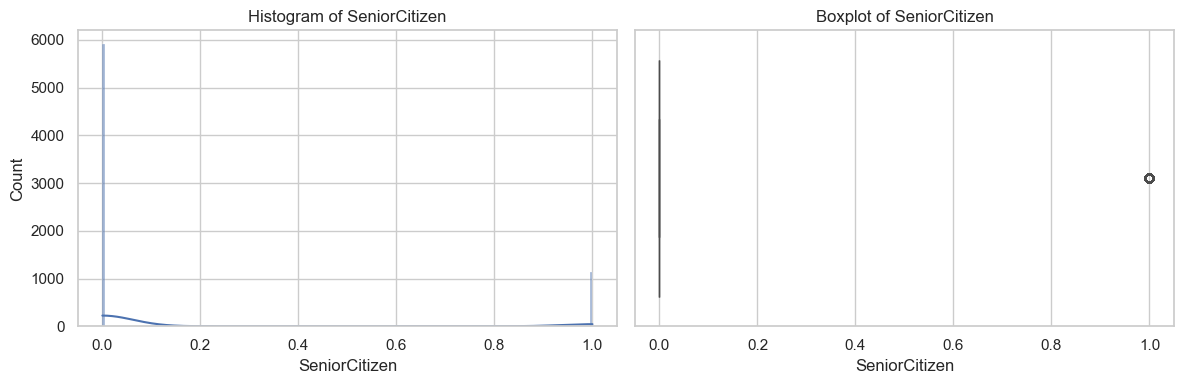

=== tenure ===


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

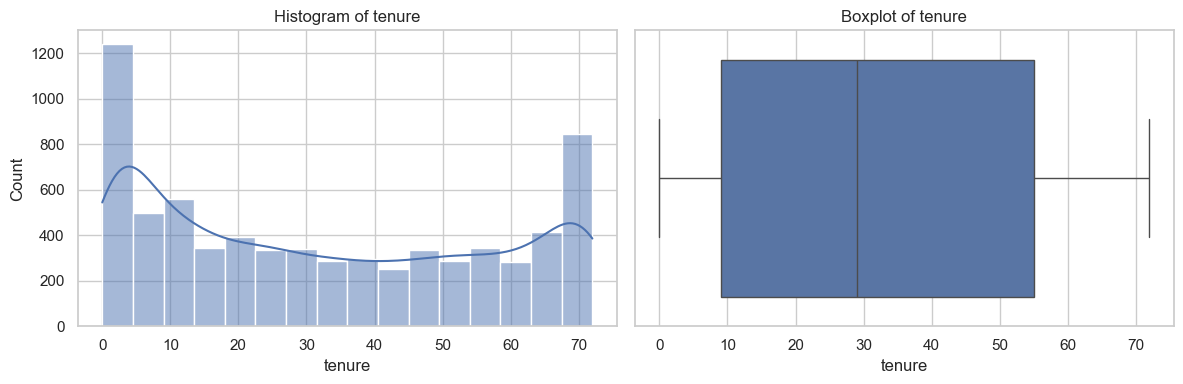

=== MonthlyCharges ===


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

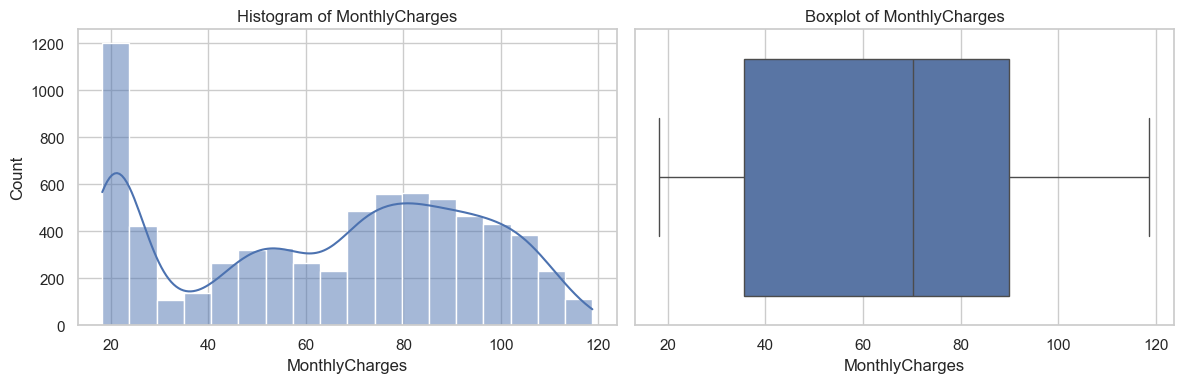

=== TotalCharges ===


count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

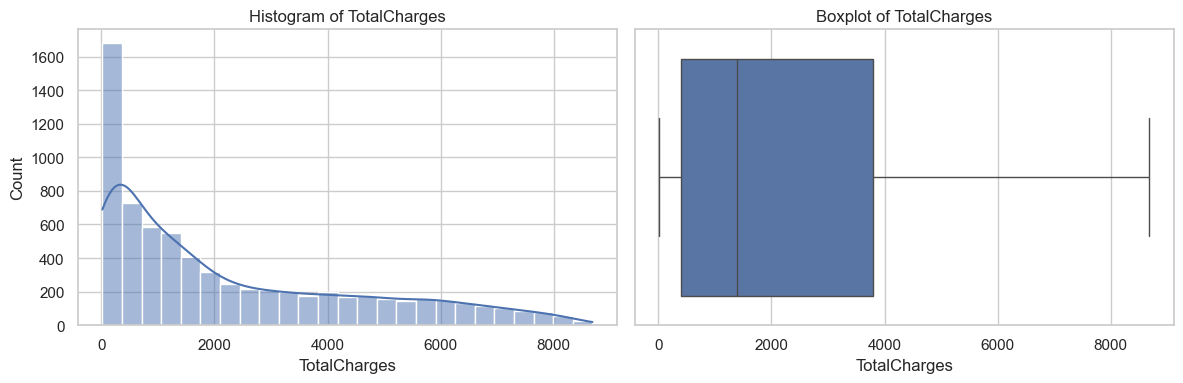

In [13]:
for col in num_cols:
    print(f"=== {col} ===")
    display(df[col].describe())
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()


🧩 Cell 13 – Bivariate: Numeric vs Churn (Boxplots)

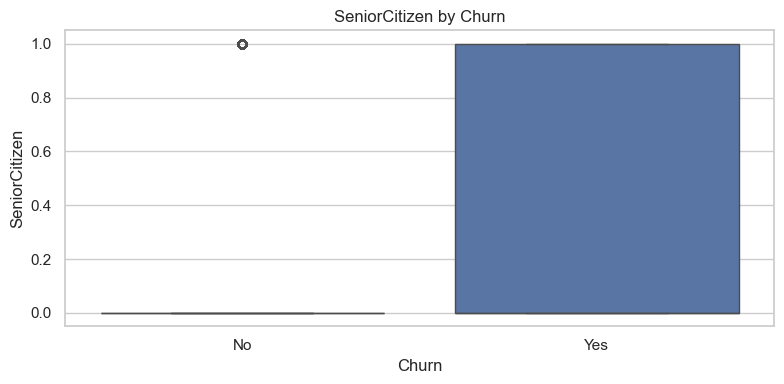

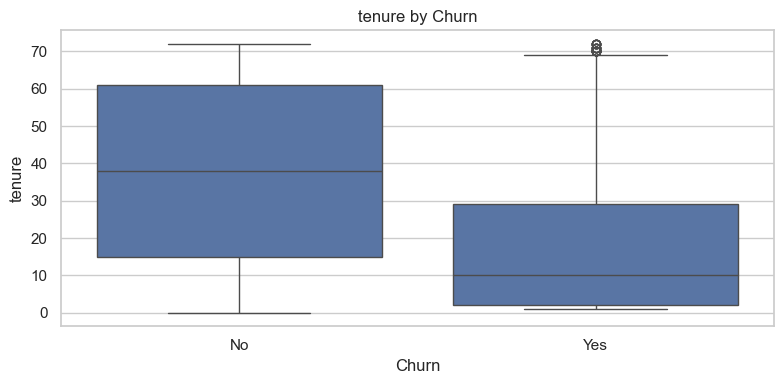

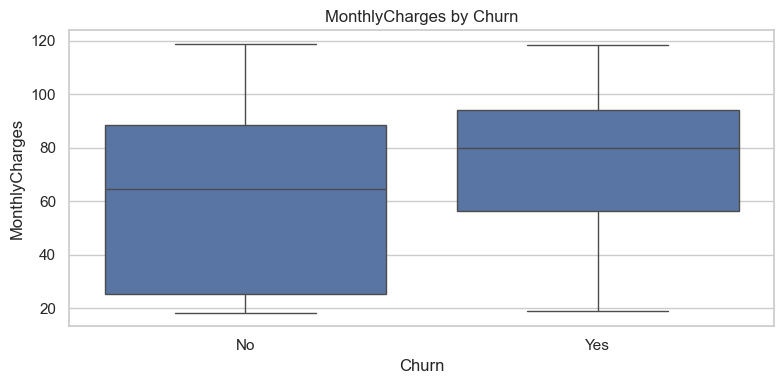

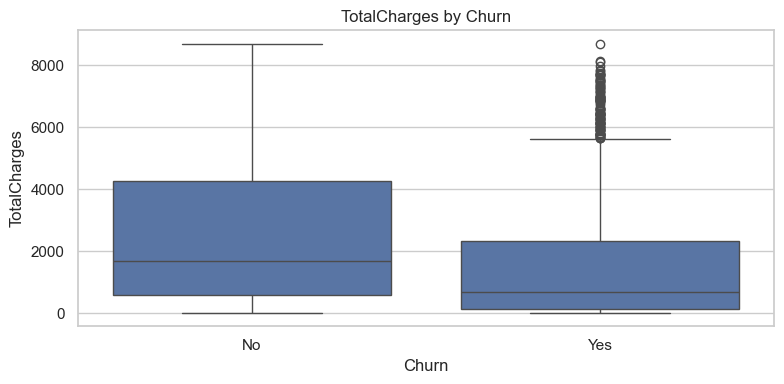

In [14]:
for col in num_cols:
    if col == "Churn":  # just in case
        continue
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} by Churn")
    plt.tight_layout()
    plt.show()


🧩 Cell 14 – Create Churn_flag (0/1) for Correlations

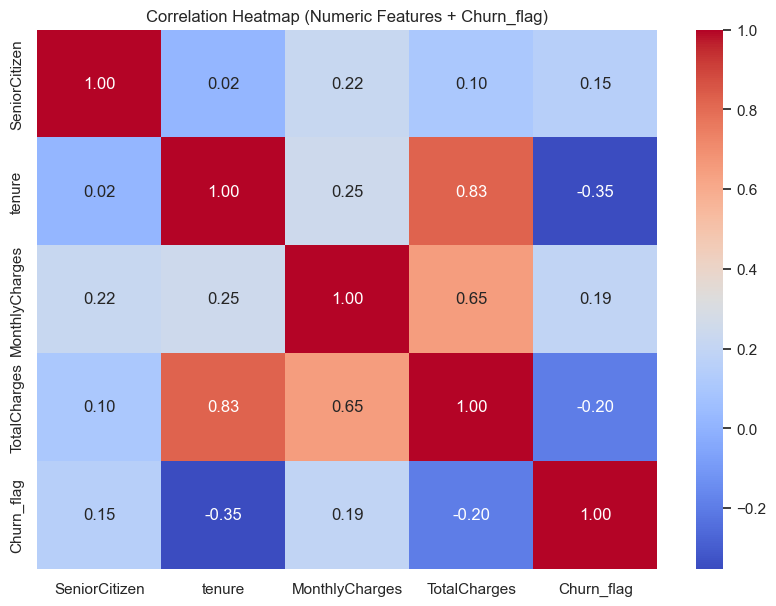

Correlation of numeric features with Churn_flag:
Churn_flag        1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199037
tenure           -0.352229
Name: Churn_flag, dtype: float64


In [15]:
# Map Yes->1, No->0
df["Churn_flag"] = df["Churn"].map({"Yes": 1, "No": 0})

num_cols_with_churn = [col for col in num_cols if col != "Churn_flag"] + ["Churn_flag"]

corr_matrix = df[num_cols_with_churn].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features + Churn_flag)")
plt.show()

print("Correlation of numeric features with Churn_flag:")
print(corr_matrix["Churn_flag"].sort_values(ascending=False))


🧩 Cell 15 – Chi-Square Tests: Categorical vs Churn

In [16]:
def chi_square_test(feature, target="Churn"):
    """
    Perform Chi-square test between a categorical feature and target (Churn).
    """
    table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(table)
    return p

chi_results = []
for col in cat_cols:
    if col == "Churn":
        continue
    p_value = chi_square_test(col, "Churn")
    chi_results.append((col, p_value))

chi_results_df = pd.DataFrame(chi_results, columns=["Feature", "p_value"]).sort_values("p_value")

chi_results_df


,Feature,p_value
12,Contract,5.863038e-258
6,OnlineSecurity,2.661150e-185
9,TechSupport,1.443084e-180
5,InternetService,9.571788e-160
14,PaymentMethod,3.682355e-140
7,OnlineBackup,2.079759e-131
8,DeviceProtection,5.505219e-122
11,StreamingMovies,2.667757e-82
10,StreamingTV,5.528994e-82
13,PaperlessBilling,4.073355e-58


🧩 Cell 16 – ANOVA: Numeric vs Churn

In [17]:
anova_results = []

for col in num_cols:
    if col == "Churn_flag":
        continue
    
    churn_yes = df[df["Churn"] == "Yes"][col]
    churn_no = df[df["Churn"] == "No"][col]
    
    f_stat, p_val = f_oneway(churn_yes, churn_no)
    anova_results.append((col, f_stat, p_val))

anova_df = pd.DataFrame(anova_results, columns=["Feature", "F_stat", "p_value"]).sort_values("p_value")

anova_df


,Feature,F_stat,p_value
1,tenure,997.268010,7.999058e-205
3,TotalCharges,290.439831,7.508609e-64
2,MonthlyCharges,273.463704,2.706646e-60
0,SeniorCitizen,164.041424,3.839860e-37


🧩 Cell 17 – Multivariate: Pairplot (Sampled)

In [18]:
# Sample to avoid very heavy plots
sample_df = df.sample(min(1000, len(df)), random_state=42)

sns.pairplot(
    sample_df[["MonthlyCharges", "tenure", "TotalCharges", "Churn_flag"]],
    hue="Churn_flag",
    diag_kind="kde"
)
plt.suptitle("Pairplot of Key Numeric Features vs Churn_flag", y=1.02)
plt.show()


KeyError: "['Tenure'] not in index"

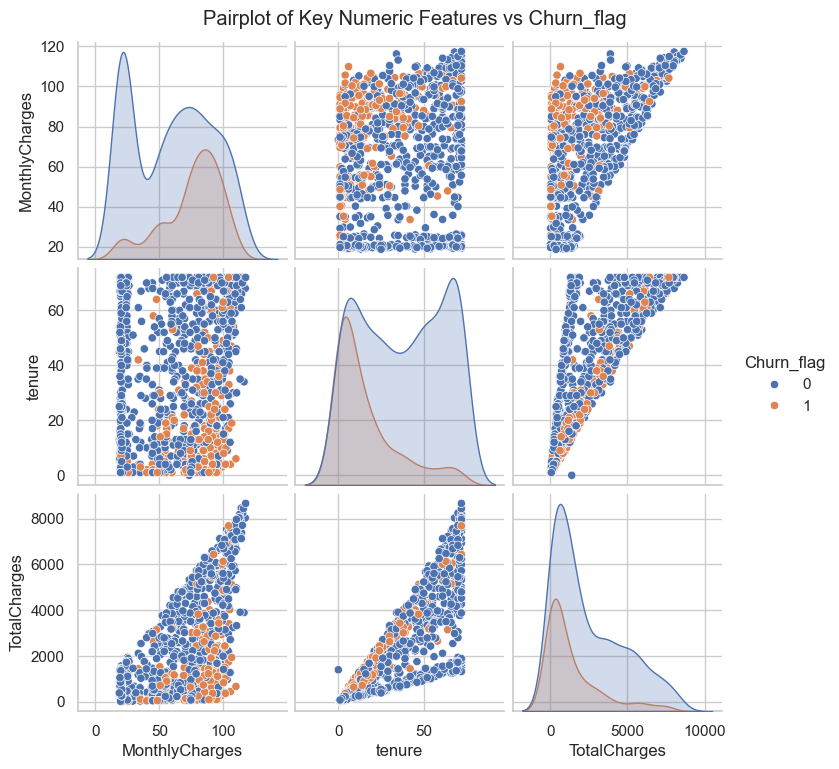

In [19]:
# Sample to avoid very heavy plots
sample_df = df.sample(min(1000, len(df)), random_state=42)

sns.pairplot(
    sample_df[["MonthlyCharges", "tenure", "TotalCharges", "Churn_flag"]],
    hue="Churn_flag",
    diag_kind="kde"
)
plt.suptitle("Pairplot of Key Numeric Features vs Churn_flag", y=1.02)
plt.show()

🧩 Cell 18 – Multivariate: Interactive Plotly Scatter

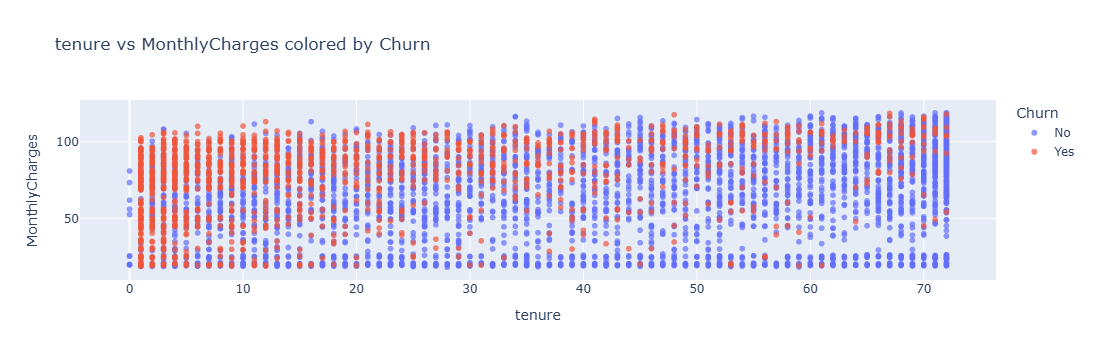

In [20]:
fig = px.scatter(
    df,
    x="tenure",
    y="MonthlyCharges",
    color="Churn",
    title="tenure vs MonthlyCharges colored by Churn",
    opacity=0.7
)
fig.show()


🧩 Cell 19 – Business Insights Summary (Print / Markdown)

print("=== Key Business Insights (Example) ===\n")

print("1️⃣ Customers with month-to-month contracts churn the most.")
print("   - Action: Incentivize longer-term contracts (discounts, bundles).")

print("\n2️⃣ Fiber optic internet users tend to churn more than DSL users.")
print("   - Action: Investigate complaints or pricing for fiber customers.")

print("\n3️⃣ High MonthlyCharges are associated with higher churn.")
print("   - Action: Design lower-priced or more transparent plans for high-risk customers.")

print("\n4️⃣ Short-tenure customers churn more often (early life churn).")
print("   - Action: Improve onboarding, early engagement programs, welcome offers.")

print("\n5️⃣ Other billing and service-related features (like paperless billing or payment method)")
print("   may correlate with churn — segment and target those groups differently.")
